# Undersampling & Multiple gridsearch

This notebook discusses Multi-label classification methods using undersampling for the [academia.stackexchange.com](https://academia.stackexchange.com/).

## Table of Contents
* [Data import](#data_import)
* [Data preparation](#data_preparation)
* [Methods](#methods)
* [Evaluation](#evaluation)

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import re
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from joblib import load
from academia_tag_recommender.experiments.experimental_classifier import available_classifier_paths

RANDOM_STATE = 0

<a id='data_import'/>

## Data import

In [2]:
from academia_tag_recommender.experiments.data import ExperimentalData

ed = ExperimentalData.load()
X_train, X_test, y_train, y_test = ed.get_train_test_set()

In [3]:
from academia_tag_recommender.experiments.transformer import BagOfWordsTransformer, Word2VecTransformer, FastTextTransformer, Doc2VecTransformer
from academia_tag_recommender.experiments.experimental_classifier import ExperimentalClassifier

<a id='data_preparation'/>

## Data Preparation

In [4]:
def create_classifier(classifier_options, name, embedding=''):
    classifier = ClasswiseClassifier(name, classifier_options, embedding, undersample=True)
    experimental_classifier = ExperimentalClassifier.load(transformer, classifier, name)
    experimental_classifier.train(train, y_train)
    experimental_classifier.score(test, y_test)
    print('Training: {}s'.format(experimental_classifier.training_time))
    print('Test: {}s'.format(experimental_classifier.test_time))
    experimental_classifier.evaluation.print_stats()

<a id='training'/>

## Training

This approach is similar to the approach shown in [notebook 4.5.3](4.5.3-me-classwise-undersampling.ipynb). But instead of training different classification methods individually, this [Classwise Classifier](../classwise_classifier.py) chooses the best performing classification method for each label. Therefore resulting in differint classification methods used in the final Classwise Classifier.

For each label each of the three classification methods is trained and their specific tuning parameter found using [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) as in [notebook 4.5.1](4.5.1-me-classwise-gridsearch.ipynb).
- Linear SVC, optimizing parameter `C`
- Logistic Regression, optimizing parameter `C`
- MLPClassifier, optimizing parameter `alpha`

[Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall#sklearn.metrics.recall_score) is used as  the scoring-function for the optimization. For reasons of that decision see [notebook 3.0](3.0-me-evaluation-metrics.ipynb).

In addition undersampling is used for each individual label as in [notebook 4.5.2](4.5.2-me-classwise-undersampling.ipynb) Instead of handing all samples to the classifier, a more balanced ratio is used as training data. The [Classwise Classifier](../classwise_classifier.py) uses a ratio of 1:25, depending on how many positive samples are available in the original data.



In [6]:
from academia_tag_recommender.classwise_classifier import ClasswiseClassifier, ClassifierOption
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [7]:
classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE)),
                     ClassifierOption(LogisticRegression(random_state=RANDOM_STATE)),
                     ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]

In [ ]:
#classifier_options = [ClassifierOption(LinearSVC(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]}),
#                     ClassifierOption(LogisticRegression(random_state=RANDOM_STATE), grid_search=True, parameter={'C':[0.1, 0.5, 1, 5, 10]}),
#                     ClassifierOption(MLPClassifier(random_state=RANDOM_STATE))]

**Word2Vec**

In [8]:
create_classifier(classifier_options, 'ClasswiseClassifier(multiple)-undersampled', 'word2vec')

Training: 7220.1371376514435s
Test: 12.642516851425171s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012548844905492268     0.07073760580411124      0.470292220878678        0.3166062071745264       0.3503433715283776       
micro                                                            0.5524819027921406       0.3062189529996179       0.39403810694529806      
macro                                                            0.3387119092154228       0.17582484417495384      0.21830975971367142      


**Doc2Vec**

In [10]:
create_classifier(classifier_options, 'ClasswiseClassifier(multiple)-undersampled', 'doc2vec')

Training: 11115.318529605865s
Test: 6.099498510360718s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.014776936294787756     0.041112454655380895     0.3392965586073204       0.24319830713422008      0.25964629217349894      
micro                                                            0.40792127127530853      0.2415456629728697       0.3034230342303423       
macro                                                            0.28159293135197117      0.12830786378175552      0.16660176342127678      


**FastText**

In [11]:
create_classifier(classifier_options, 'ClasswiseClassifier(multiple)-undersampled', 'fasttext')

Training: 7764.744542121887s
Test: 17.784624338150024s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.012359829440590595     0.0761789600967352       0.4849576783555018       0.32896614268440144      0.36376307556476833      
micro                                                            0.5641894754681807       0.31801681314482233      0.40675688059382353      
macro                                                            0.3993220624231597       0.20266305400439819      0.2526704493223032       


**TFIDF**

In [12]:
create_classifier(classifier_options, 'ClasswiseClassifier(multiple)-undersampled', 'tfidf')

Training: 53232.378200531006s
Test: 27.206909656524658s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.015363075160694966     0.042926239419588876     0.3838044855185121       0.33137041515517934      0.32584490613511174      
micro                                                            0.40382105138246116      0.32567709828691743      0.3605636787454969       
macro                                                            0.4824109259859804       0.23154564004494269      0.2929722351606384       


**Count**

In [13]:
create_classifier(classifier_options, 'ClasswiseClassifier(multiple)-undersampled', 'count')

Training: 60291.75754904747s
Test: 28.483051300048828s
               Hamming Loss             Accuracy                 Precision                Recall                   F1                       
samples        0.024087061668681985     0.024667472793228538     0.27137354611402886      0.32302700523982264      0.25963374394195077      
micro                                                            0.2220580994583949       0.3234830010041601       0.2633422865818055       
macro                                                            0.2949263808999858       0.22961012336969805      0.2399698447786023       


<a id='evaluation'/>

## Evaluation

In [14]:
paths = available_classifier_paths('multiple')

In [15]:
evals = []
for path in paths:
    clf = load(path)
    evaluation = clf.evaluation
    name = re.findall(r'\(([\w,\d]*)\)', str(path))[0]
    transformer = re.findall(r'=([\w,\d]*)', str(path))[1]
    evals.append([name + ' ' + transformer, evaluation])

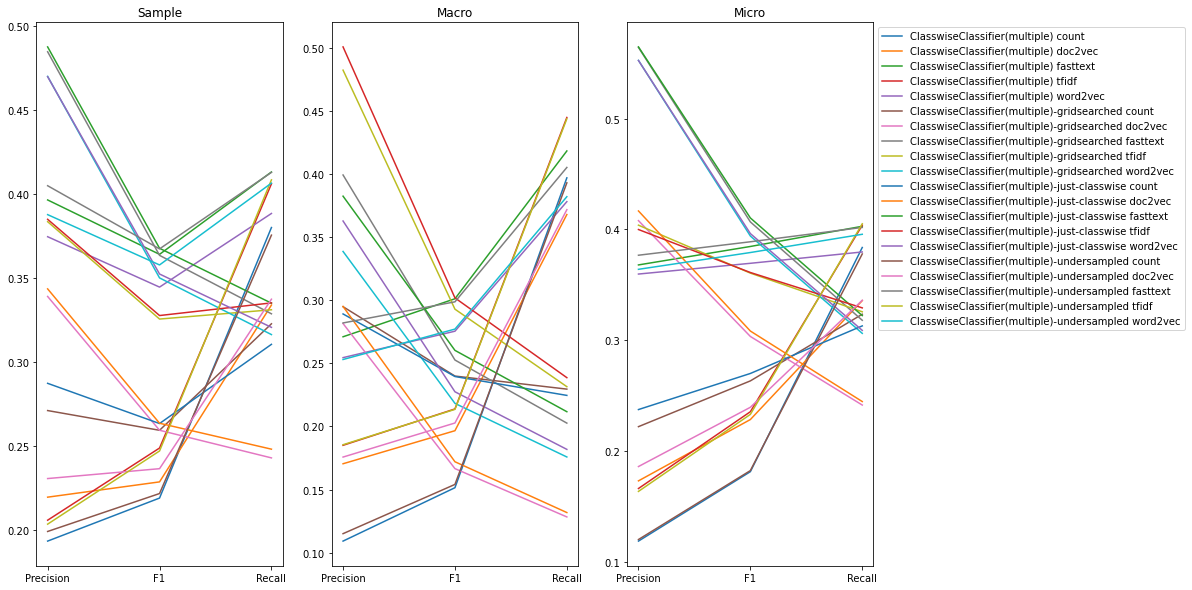

In [16]:
x_ = ['Precision', 'F1', 'Recall']
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].set_title('Sample')
axes[1].set_title('Macro')
axes[2].set_title('Micro')
for eval_ in evals:
    evaluator = eval_[1]
    axes[0].plot(x_, [evaluator.precision_samples, evaluator.f1_samples, evaluator.recall_samples], label=eval_[0])
    axes[1].plot(x_, [evaluator.precision_macro, evaluator.f1_macro, evaluator.recall_macro], label=eval_[0])
    axes[2].plot(x_, [evaluator.precision_micro, evaluator.f1_micro, evaluator.recall_micro], label=eval_[0])
axes[2].legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

In [17]:
top_3 = sorted(paths, key=lambda x: load(x).evaluation.recall_macro, reverse=True)[:3]

In [18]:
def per_label_accuracy(orig, prediction):
    if not isinstance(prediction, np.ndarray):
        prediction = prediction.toarray()
    l = 1 - orig - prediction
    return np.average(l, axis=0)

In [19]:
from sklearn.metrics import classification_report
classwise_results = []
for path in top_3:
    clf = load(path)
    test = clf.transform(X_test)
    prediction = clf.predict(test)
    label_accuracies = per_label_accuracy(y_test, prediction)
    report = classification_report(y_test, prediction, output_dict=True, zero_division=0)
    classwise_report = {}
    for i, result in enumerate(report):
        if i < len(label_accuracies):
            classwise_report[result] = report[result]
            classwise_report[result]['accuracy'] = label_accuracies[int(result)]
    name = re.findall(r'\(([\w,\d]*)\)', str(path))[0]
    transformer = re.findall(r'=([\w,\d]*)', str(path))[1]
    classwise_results.append((name + ' ' + transformer, classwise_report))

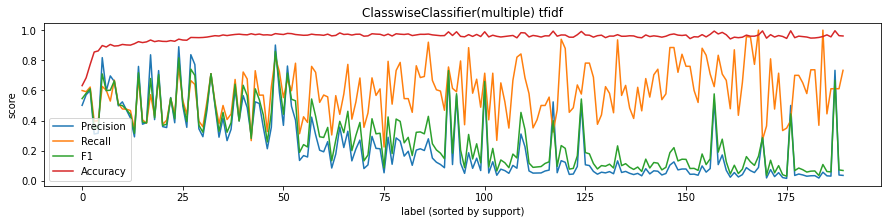

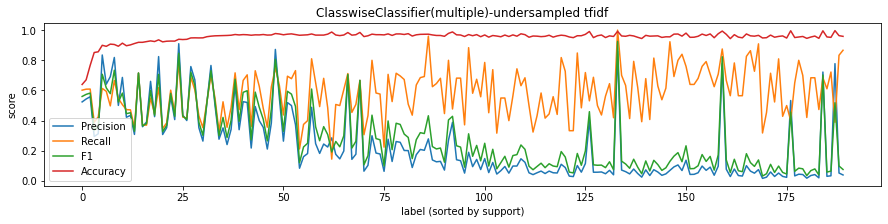

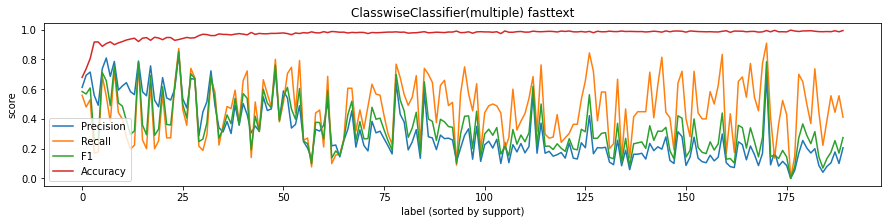

In [20]:
import numpy as np
x_ = np.arange(0, len(y_test[0]))
for classwise_result in classwise_results:
    name, results = classwise_result
    _, fig_1 = plt.subplots(figsize=(15,3))
    fig_1.set_title(name)
    sorted_results = sorted(results, key=lambda x: results[x]['support'], reverse=True)
    fig_1.plot(x_, [results[result]['precision'] for result in sorted_results][0:len(x_)], label='Precision')
    fig_1.plot(x_, [results[result]['recall'] for result in sorted_results][0:len(x_)], label='Recall')
    fig_1.plot(x_, [results[result]['f1-score'] for result in sorted_results][0:len(x_)], label='F1')
    fig_1.plot(x_, [results[result]['accuracy'] for result in sorted_results][0:len(x_)], label="Accuracy")
    fig_1.set_xlabel('label (sorted by support)')
    fig_1.set_ylabel('score')
    fig_1.legend(loc='best')
plt.show()